In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from foqal.utils.io import IO

In [23]:
io = IO.directory(
        folder="entangled-state-data", include_date=False, include_uuid=False, verbose=False,
    )

df = io.load_dataframe("summary_of_fitting.txt")
df

,model,m,p,run,latent_dim,train_loss,loss_run0,loss_run1,loss_run2,t,lr,n_steps
0,ClassicalCommonCause,30,0.0,0,100,0.001451,0.001451,0.001487,0.001494,3.270972,0.05,400
1,ClassicalCommonCause,30,0.0,1,100,0.001457,0.001473,0.001457,0.001484,1.548892,0.05,400
2,ClassicalCommonCause,30,0.0,2,100,0.001465,0.001470,0.001474,0.001465,1.322467,0.05,400
3,Superdeterminism,30,0.0,0,100,0.000059,0.000059,0.000266,0.000263,2.096364,0.05,400
4,Superdeterminism,30,0.0,1,100,0.000059,0.000266,0.000059,0.000263,2.154274,0.05,400
5,Superdeterminism,30,0.0,2,100,0.000057,0.000267,0.000265,0.000057,2.086423,0.05,400
6,Superluminal,30,0.0,0,100,0.000062,0.000062,0.000263,0.000262,1.578812,0.05,400
7,Superluminal,30,0.0,1,100,0.000060,0.000265,0.000060,0.000258,1.366344,0.05,400
8,Superluminal,30,0.0,2,100,0.000061,0.000263,0.000258,0.000061,1.348404,0.05,400
9,ClassicalCommonCause,30,0.2,0,100,0.000274,0.000274,0.000333,0.000313,1.388288,0.05,400


[0.0014505847, 0.00027374522, 0.00012220662, 0.00012600653, 0.00011410705, 0.00011818447]
[0.0014867156, 0.00033283108, 0.00023427838, 0.00024711006, 0.00025312096, 0.0002581993]
[5.915095e-05, 5.968466e-05, 5.9380196e-05, 6.606216e-05, 5.5919427e-05, 6.0520993e-05]
[0.0002663668, 0.00030102328, 0.00029522227, 0.00030096274, 0.0003104974, 0.000318229]
[6.1650695e-05, 5.7371704e-05, 6.279701e-05, 5.9946527e-05, 5.8224963e-05, 5.766348e-05]
[0.00026319287, 0.0003035628, 0.00029435806, 0.0003093354, 0.0003085148, 0.00031903974]


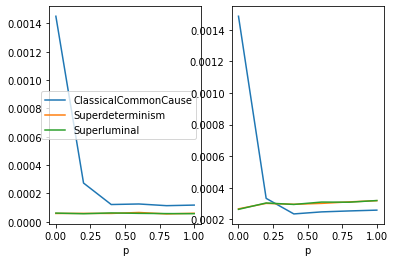

In [26]:
models = df['model'].unique()
colors = ['teal', 'orange', 'salmon']
# ms = (5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100)
ms = df['m'].unique()
ps = df['p'].unique()
ms = (30,)
# ps = (0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
runs = (0, 1, 2)
q = list(itertools.product(ms, ps, runs))

fig, axs = plt.subplots(nrows=1, ncols=2, sharey='col')
for model, c in zip(models, colors):
    for m in ms:
        train_mean = []
        test_mean = []
        for p in ps:
            dfi = df[(df['model']==model) & (df['m'] == m) & (df['p'] == p) & (df['run'] == 0)]
            train_mean.append(dfi['loss_run0'].mean())
            test_mean.append(dfi['loss_run1'].mean())

        axs[0].plot(ps, train_mean, label=f"{model}")
        axs[1].plot(ps, test_mean)

axs[0].legend()
for ax in axs:
    ax.set(xlabel='p')